# Data Preparation

## Dataset

- A census dataset is available at [github](https://github.com/WinVector/zmPDSwR/blob/master/Custdata/custdata2.tsv), which will be used for demonstrating the steps of data cleaning, imputation and prepartion. The dataset is taken from the book [Practical Data Science with R](https://www.manning.com/books/practical-data-science-with-r)

- The dataset contains information about customers like 
    - gender
    - if he or she is currently employed or not
    - income
    - marital status
    - house type where he or she lives
    - whether moved in recently 
    - number of vehicles owned
    - age 
    - state of residence
    - Whether he or she has an insurance cover. 

In [1]:
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

## Read Dataset

In [2]:
custdata = pd.read_csv("custdata.tsv", sep = "\t")

In [3]:
custdata.head( 3 )

,custid,sex,is.employed,income,marital.stat,health.ins,housing.type,recent.move,num.vehicles,age,state.of.res
0,2068,F,NaN,11300,Married,True,Homeowner free and clear,False,2.0,49,Michigan
1,2848,M,True,4500,Never Married,False,Rented,True,3.0,22,Georgia
2,5641,M,True,20000,Never Married,False,Occupied with no rent,False,0.0,22,New Mexico


## Metadata Exploration

In [4]:
custdata.shape

(910, 11)

In [5]:
custdata.columns

Index(['custid', 'sex', 'is.employed', 'income', 'marital.stat', 'health.ins',
       'housing.type', 'recent.move', 'num.vehicles', 'age', 'state.of.res'],
      dtype='object')

In [6]:
custdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 910 entries, 0 to 909
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   custid        910 non-null    int64  
 1   sex           910 non-null    object 
 2   is.employed   655 non-null    object 
 3   income        910 non-null    int64  
 4   marital.stat  910 non-null    object 
 5   health.ins    910 non-null    bool   
 6   housing.type  879 non-null    object 
 7   recent.move   879 non-null    object 
 8   num.vehicles  879 non-null    float64
 9   age           910 non-null    int64  
 10  state.of.res  910 non-null    object 
dtypes: bool(1), float64(1), int64(3), object(6)
memory usage: 72.1+ KB


#### Note:

* It can be observed that some of the columns like *is.employed*, *housing.type*, *recent.move* and *num.vehicles* have missing values.

## Visualize the missing values

* There are libaries like **missingno** are available for visualizing missing values and if any relationship exist between these missing values like if one is missing the other is also missing. 

* *missingno* can be installed through *pip*
    - pip install missingno

In [7]:
#!pip install missingno

In [8]:
import matplotlib.pyplot as plt
import seaborn as sn
import missingno as msno

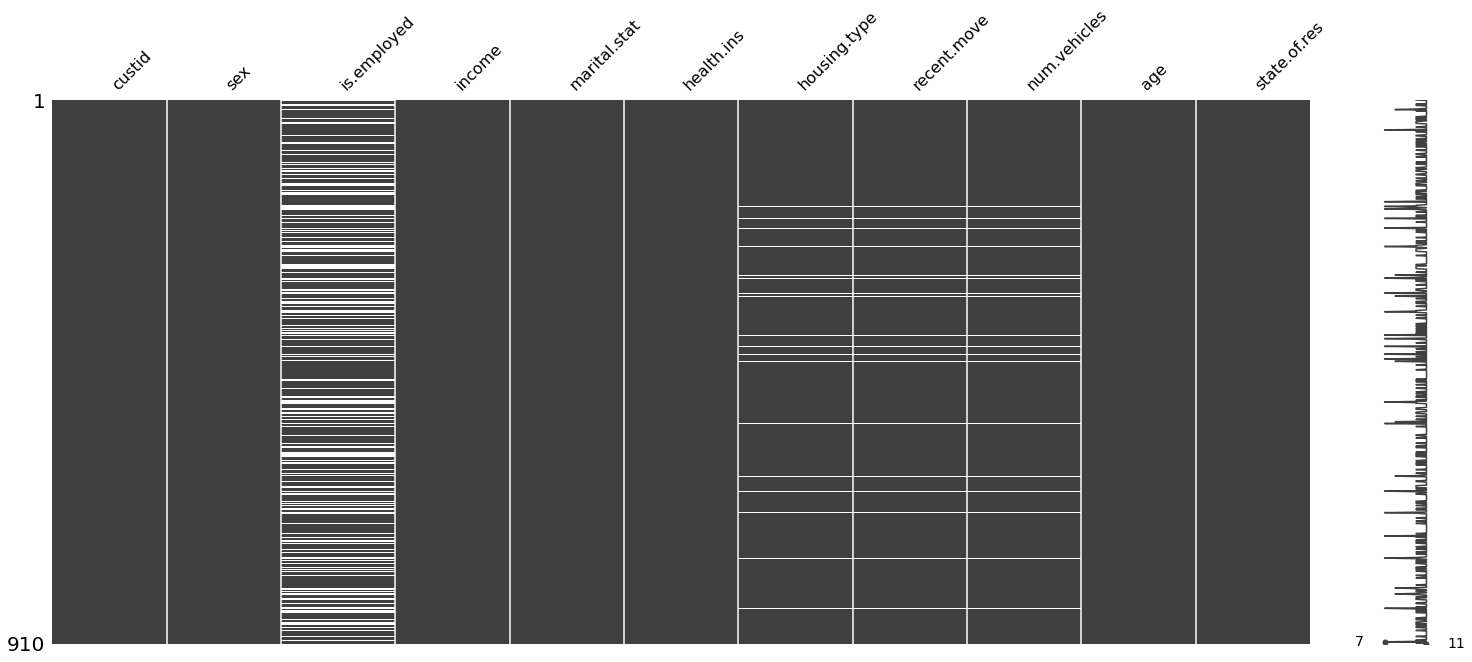

In [9]:
msno.matrix(custdata);

#### Note:

* *is.employed* is missing from may observations. *housing.type*, *recent.move* and *num.vehicles* are also missing from some observations, but there seems to be some pattern to it. We can create a heatmap of these missing values and confirm this pattern.

### Count or percentage of missing values

In [10]:
custdata.isnull().sum()

custid            0
sex               0
is.employed     255
income            0
marital.stat      0
health.ins        0
housing.type     31
recent.move      31
num.vehicles     31
age               0
state.of.res      0
dtype: int64

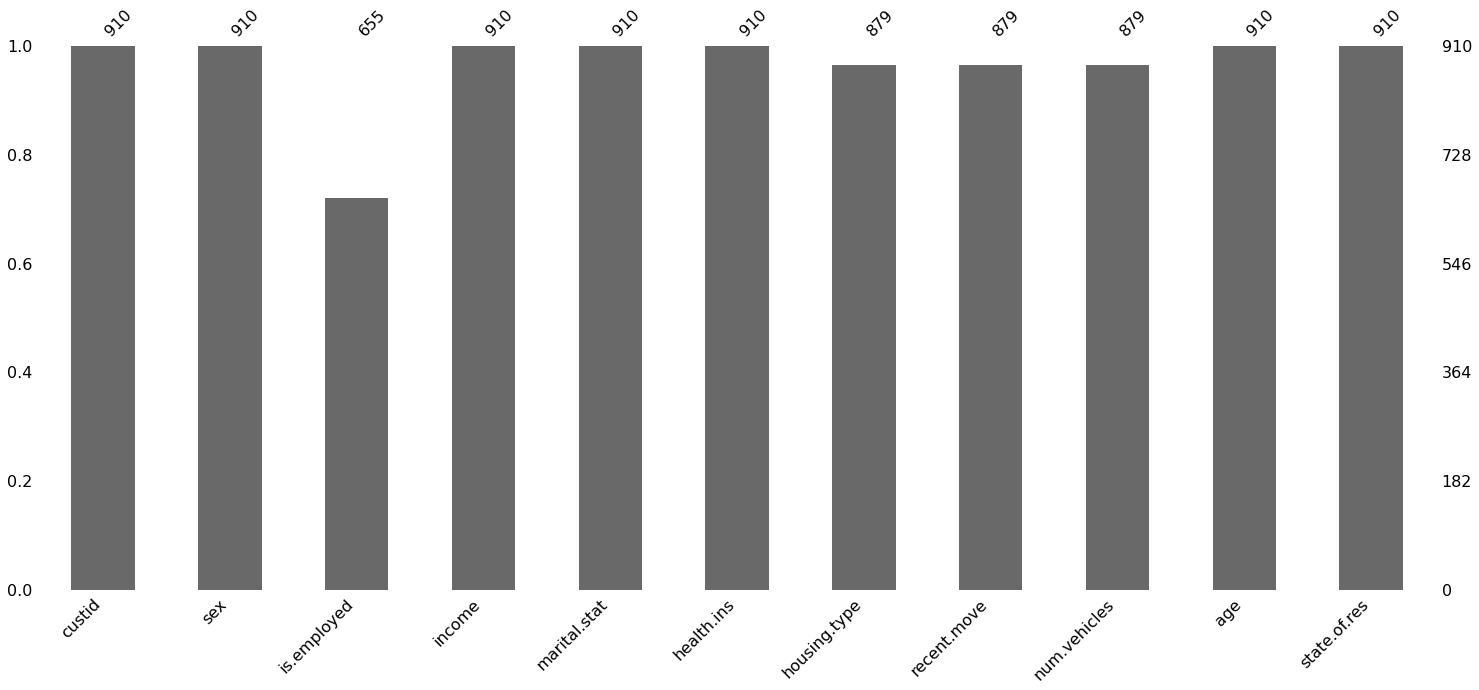

In [11]:
msno.bar(custdata);

## How to deal with missing values?

There are multiple steps that can be taken

- Obtain the missing data;
- Leave out incomplete cases and use only those for which all variables are available;
- Replace missing data by a conservative estimate, e.g. the sample mean;
- Estimate the missing data from the other data on the person.

### How much missing value is accepted?

- More than 20% is too much missing.
- In some domain, missing values can not be imputed as it may lead high risk or it may inject too much noise.

### Drop samples with missing values

* All columns with null values can be removed from the dataset. Remove all observations where at least one data element is missing. 

In [12]:
cust_clean = custdata.dropna()

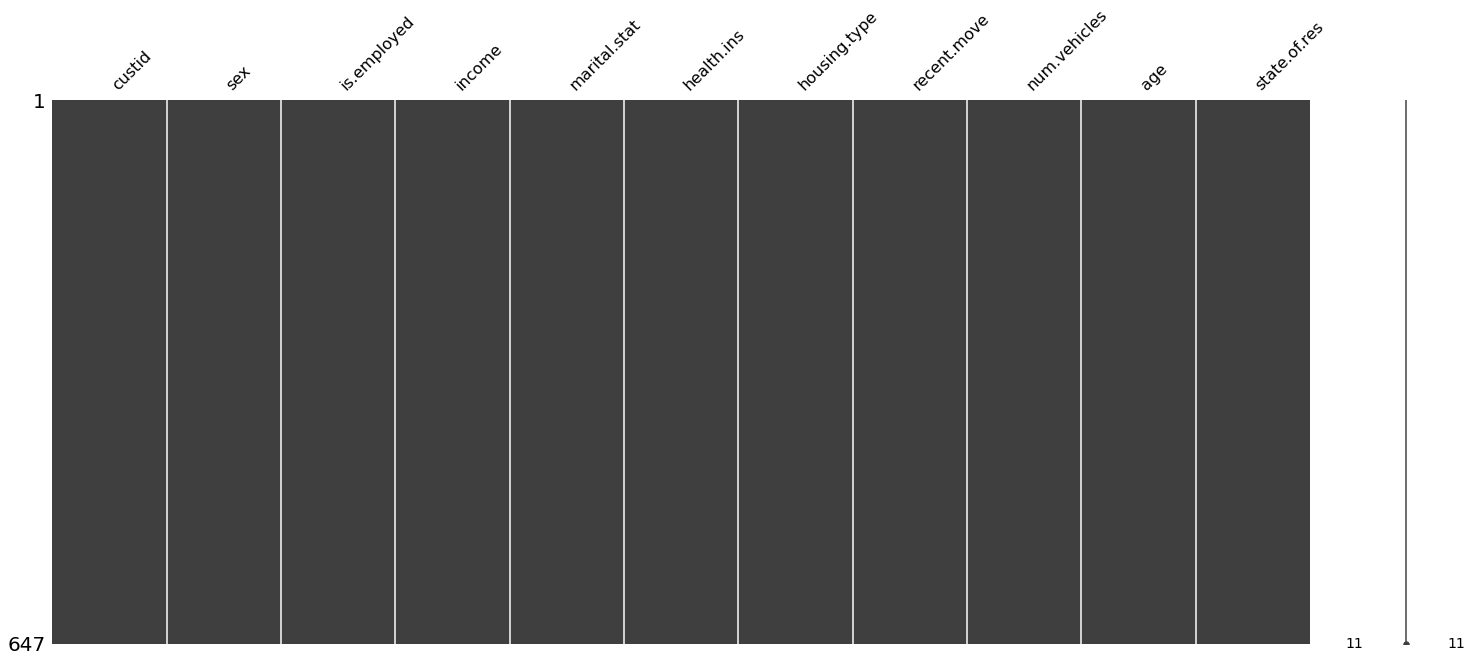

In [13]:
msno.matrix(cust_clean);

### Drop if values are missing from specific columns

* For example, only removing those observations where *is.employed* data is missing.

In [14]:
cust_clean = custdata.dropna(subset=['is.employed'])

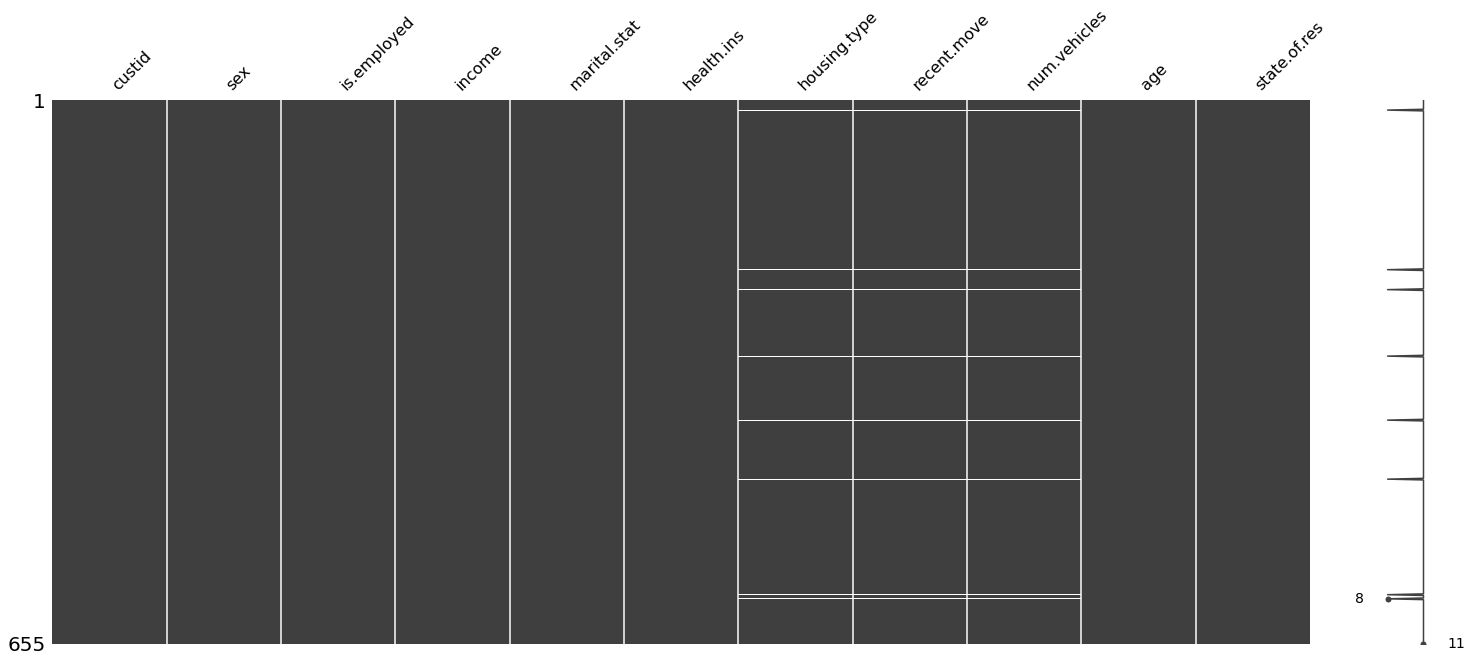

In [15]:
msno.matrix(cust_clean);

## Imputation Techniques

- Impute with default values
- Impute with estimated values
    - Numerial Features - Mean or median based imputation
    - Categorical Features - Most Frequent 
- Model based imputations

In [16]:
custdata['is.employed_imputed1'] = custdata['is.employed'].fillna(False)

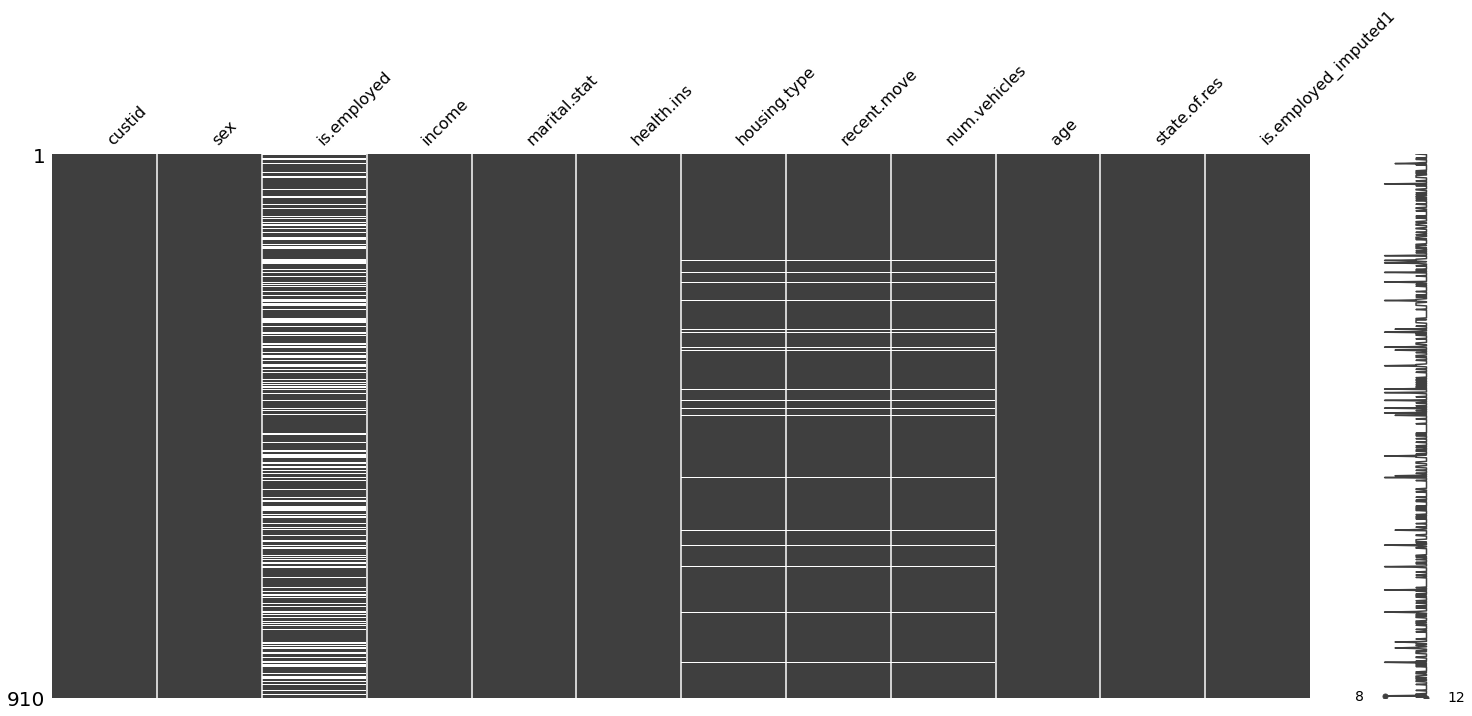

In [17]:
msno.matrix(custdata);

## Income vs. Is Employed

In [18]:
custdata['is.employed'].value_counts(dropna=False)

True     593
NaN      255
False     62
Name: is.employed, dtype: int64

In [19]:
income_employed = custdata[custdata['is.employed'] == True]['income']
income_not_employed = custdata[custdata['is.employed'] == False]['income']
income_nan = custdata[custdata['is.employed'].isnull()]['income']

In [20]:
len(income_nan)

255

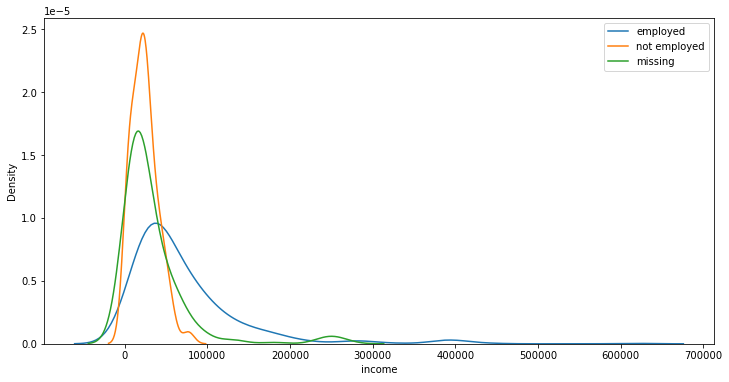

In [21]:
plt.figure(figsize=(12, 6))
sn.kdeplot(income_employed, label = 'employed')
sn.kdeplot(income_not_employed, label = 'not employed')
sn.kdeplot(income_nan, label = 'missing');
plt.legend();

In [22]:
from scipy import stats

In [23]:
stats.ttest_ind(income_employed, income_nan)

Ttest_indResult(statistic=7.579601035289222, pvalue=9.106272547118738e-14)

In [24]:
stats.ttest_ind(income_not_employed, income_nan)

Ttest_indResult(statistic=-1.7830518684470351, pvalue=0.07554069839127192)

### Is *is.employed* missing below a certain income level?

In [25]:
avg_income_not_employed = income_not_employed.mean()
avg_income_not_employed

23904.032258064515

In [26]:
custdata['is.employed_imputed2'] = (custdata['income']
                                    .map(lambda x: False 
                                         if x < avg_income_not_employed else True))

In [27]:
custdata[['income', 'is.employed_imputed2']].sample(10)

,income,is.employed_imputed2
901,30000,True
258,55000,True
295,15000,False
422,36000,True
709,99000,True
843,165200,True
876,44900,True
780,42000,True
287,34000,True
470,54000,True


## Imputing Number of Vehicles

- *num.vehicles* is a numerical variable and is a discrete variable. An imputation strategy of most frequent can be adopted for the missing values of this column.

In [28]:
custdata['numvehicles_IS1'] = custdata['num.vehicles'].fillna(0)

In [29]:
custdata[custdata.income < 1000 ][0:5]

,custid,sex,is.employed,income,marital.stat,health.ins,housing.type,recent.move,num.vehicles,age,state.of.res,is.employed_imputed1,is.employed_imputed2,numvehicles_IS1
50,68013,M,NaN,100,Divorced/Separated,False,NaN,NaN,NaN,28,California,False,False,0.0
131,181385,F,NaN,290,Married,False,Homeowner free and clear,False,2.0,28,Wisconsin,False,False,2.0
178,259807,M,NaN,440,Married,True,NaN,NaN,NaN,49,West Virginia,False,False,0.0
182,268667,M,NaN,200,Never Married,True,NaN,NaN,NaN,31,Pennsylvania,False,False,0.0
293,456859,M,True,80,Never Married,True,NaN,NaN,NaN,18,California,True,False,0.0


In [30]:
from sklearn.impute import SimpleImputer

In [31]:
mean_imputer = SimpleImputer(strategy='most_frequent', add_indicator=True)

In [32]:
num_vehicle_imputed = mean_imputer.fit_transform(custdata[['num.vehicles']])
num_vehicle_imputed

array([[2., 0.],
       [3., 0.],
       [0., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [2., 0.]])

In [33]:
custdata['numvehicles_IS2'] = num_vehicle_imputed[:, 0]
custdata['numvehicles_ind'] = num_vehicle_imputed[:, 1]

In [34]:
custdata[['num.vehicles',
          'numvehicles_IS2',
          'numvehicles_ind']].sample(10, random_state = 100)

,num.vehicles,numvehicles_IS2,numvehicles_ind
106,2.0,2.0,0.0
24,2.0,2.0,0.0
487,1.0,1.0,0.0
399,NaN,2.0,1.0
837,1.0,1.0,0.0
40,3.0,3.0,0.0
107,1.0,1.0,0.0
608,0.0,0.0,0.0
736,1.0,1.0,0.0
579,2.0,2.0,0.0


### Using Model based Imputation

- The missing data can aso be estimated from other variables, for example income, age, housing.type etc. 

- We will discuss this later.

## When to apply imputation?

- We will discuss this later.

## Income Vs Insurance

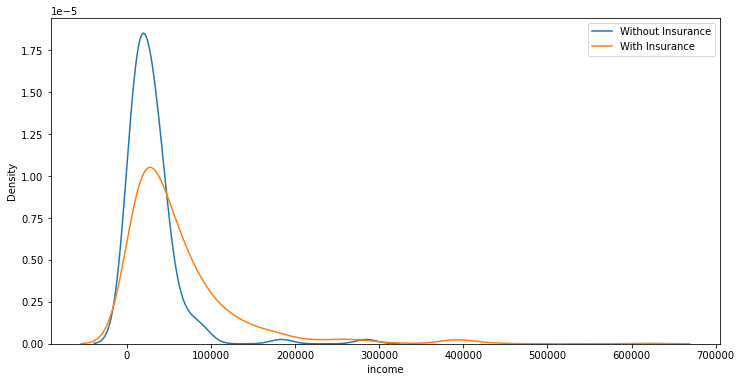

In [35]:
plt.figure(figsize=(12, 6))
sn.kdeplot(data = custdata[custdata['health.ins'] == False], 
           x = 'income', 
           label = 'Without Insurance');
sn.kdeplot(data = custdata[custdata['health.ins'] == True], 
           x = 'income', 
           label = 'With Insurance');
plt.legend();

## Age Vs. Income

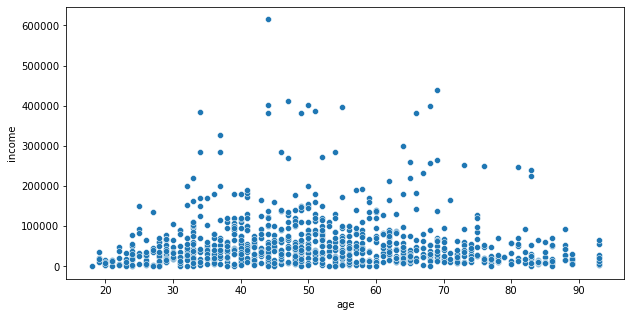

In [45]:
plt.figure(figsize=(10, 5))
sn.scatterplot(data = custdata,
               x = 'age',
               y = 'income');

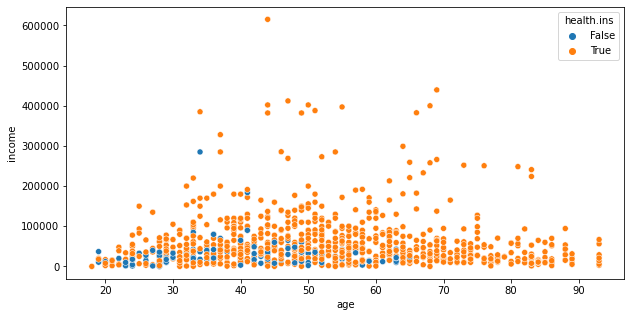

In [46]:
plt.figure(figsize=(10, 5))
sn.scatterplot(data = custdata,
               x = 'age',
               y = 'income',
               hue = 'health.ins');

## Data Binning

- Sometimes a continuous variable may need to be binned into categories. 
    - For example, age. Sometimes it may make sense to divide the ages into ranges and then create categories like young, adult, midage & old. 
    - For example, income can be categorized into low-income, middle-income and high-income etc.

In [47]:
bins = [0,18, 35, 60,120]
group_names = ['young', 'adult', 'midage', 'old']

custdata['agegroup'] = pd.cut(custdata['age'], bins, labels=group_names)

In [48]:
custdata[["age", "agegroup"]][0:10]

,age,agegroup
0,49,midage
1,22,adult
2,22,adult
3,31,adult
4,40,midage
5,39,midage
6,48,midage
7,44,midage
8,70,old
9,46,midage


## Income Vs Age Group

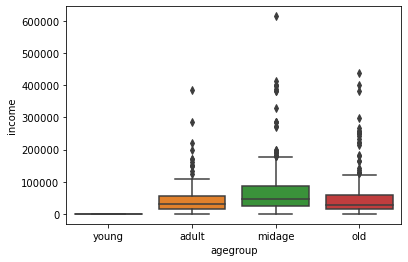

In [49]:
sn.boxplot(data = custdata,
           x = 'agegroup',
           y = 'income');